## Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

## Load the Dataset

In [2]:
data_path = '../data/processed/Preprocessed_Data.csv'
dataset = pd.read_csv(data_path)

In [3]:
dataset.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Week Days', 'Day', 'Month', 'Year', 'Spring', 'Summer', 'Winter'],
      dtype='object')

## Train & Test

In [4]:
x = dataset.drop("Rented Bike Count", axis=1)
y = dataset["Rented Bike Count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

## Standard Scalling

In [5]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [6]:
scaler. mean_

array([1.15382420e+01, 1.26390411e+01, 5.83127854e+01, 1.73099315e+00,
       1.42119121e+03, 5.82893836e-01, 1.43664384e-01, 8.19634703e-02,
       4.79452055e-02, 9.62328767e-01, 3.02454338e+00, 1.58949772e+01,
       6.46575342e+00, 2.01791096e+03, 2.53424658e-01, 2.42009132e-01,
       2.61986301e-01])

In [7]:
scaler.scale_

array([6.83770761e+00, 1.21231455e+01, 2.02429676e+01, 1.06276946e+00,
       6.11158127e+02, 8.76114173e-01, 1.28586220e+00, 4.42756289e-01,
       2.13650328e-01, 1.90399872e-01, 1.99656449e+00, 8.80855087e+00,
       3.46985923e+00, 2.84803053e-01, 4.34971954e-01, 4.28299792e-01,
       4.39715225e-01])

## Training the Model
### Linear Regression

In [8]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred = linear_model.predict(x_test)

In [10]:
y_pred  

array([ 806.99832375,  945.3451708 , -198.58157433, ...,  -26.00759034,
        486.78893875, -126.13935111])

## Model Evaluation

In [11]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"[MSE: {round(MSE,3)}, RMSE: {round(RMSE,3)}, MAE: {round(MAE,3)}, R2: {round(R2,3)}]")

[MSE: 181113.882, RMSE: 425.575, MAE: 319.861, R2: 0.543]


In [12]:
def get_metrics(y_test, y_pred, model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} : [MSE: {round(MSE,3)}, RMSE: {round(RMSE,3)}, MAE: {round(MAE,3)}, R2: {round(R2,3)}]")
    
get_metrics(y_test, y_pred, "LinearRegression")

LinearRegression : [MSE: 181113.882, RMSE: 425.575, MAE: 319.861, R2: 0.543]


### Train Multiple Models

In [13]:
rir = Ridge().fit(x_train, y_train)
y_predi_rir = rir.predict(x_test)

lar = Lasso().fit(x_train, y_train)
y_predi_lar = lar.predict(x_test)

polynomial = PolynomialFeatures(2)
x_train_polynomial = polynomial.fit_transform(x_train)
x_test_polynomial = polynomial.fit_transform(x_test)

polynomial_r = LinearRegression().fit(x_train_polynomial, y_train)
y_predi_polynomial = polynomial_r.predict(x_test_polynomial)

svr = SVR(C=10000).fit(x_train, y_train)
y_predi_svr = svr.predict(x_test)

knnr = KNeighborsRegressor().fit(x_train, y_train)
y_predi_knnr = knnr.predict(x_test)

dtr = DecisionTreeRegressor().fit(x_train, y_train)
y_predi_dtr = dtr.predict(x_test)

rfr = RandomForestRegressor().fit(x_train, y_train)
y_predi_rfr = rfr.predict(x_test)


In [15]:
get_metrics(y_test, y_predi_rir, "Ridge")
get_metrics(y_test, y_predi_lar, "Lasso")
get_metrics(y_test, y_predi_polynomial, "PolynomialFeatures")
get_metrics(y_test, y_predi_svr, "SVR")
get_metrics(y_test, y_predi_knnr, "KNeighborsRegressor")
get_metrics(y_test, y_predi_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_predi_rfr, "RandomForestRegressor")

Ridge : [MSE: 181076.024, RMSE: 425.53, MAE: 319.817, R2: 0.543]
Lasso : [MSE: 180182.628, RMSE: 424.479, MAE: 318.625, R2: 0.545]
PolynomialFeatures : [MSE: 2.5974476562587648e+20, RMSE: 16116599071.326, MAE: 11796384336.345, R2: -655337321805187.2]
SVR : [MSE: 60696.807, RMSE: 246.367, MAE: 141.356, R2: 0.847]
KNeighborsRegressor : [MSE: 87536.682, RMSE: 295.866, MAE: 185.639, R2: 0.779]
DecisionTreeRegressor : [MSE: 62851.715, RMSE: 250.702, MAE: 133.597, R2: 0.841]
RandomForestRegressor : [MSE: 28448.95, RMSE: 168.668, MAE: 95.121, R2: 0.928]


### Visualize Model Predication

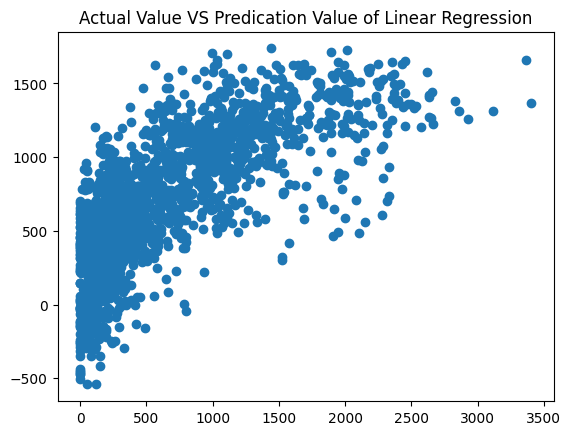

In [16]:
plt.scatter(y_test, y_pred)
plt.title("Actual Value VS Predication Value of Linear Regression")
plt.show()

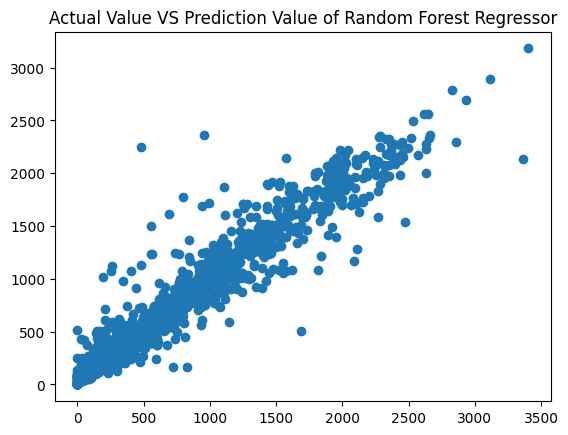

In [17]:
plt.scatter(y_test, y_predi_rfr)
plt.title("Actual Value VS Prediction Value of Random Forest Regressor")
plt.show()

### Hyperparameter Tunning for Random Forest Regression

In [18]:
# Hyper Parameter tunning for Random Forest Regression
number_of_est = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
maximum_features = ['auto', 'sqrt']
maximum_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
minimum_samples_split = [2, 5, 10]
minimum_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

parameter_grid = {'n_estimators': number_of_est,
               'max_features': maximum_features,
               'max_depth': maximum_depth,
               'min_samples_split': minimum_samples_split,
               'min_samples_leaf': minimum_samples_leaf,
               'bootstrap': bootstrap}

In [19]:
import time
start_time = time.time()

random_forest_regressor_tuning = RandomForestRegressor()

random_forest_regressor_random_search = RandomizedSearchCV(estimator=random_forest_regressor_tuning, param_distributions=parameter_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_forest_regressor_random_search.fit(x_train, y_train)
y_pred_random_forest_regressor_random_search = random_forest_regressor_random_search.predict(x_test)

print("Time take to trainning using randomize search: ", time.time() - start_time)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


d:\Education\UofR\SEM2\711 - Foundations of Data Science\Project\Bike-Sharing-Demand-Prediction\.venev\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Education\UofR\SEM2\711 - Foundations of Data Science\Project\Bike-Sharing-Demand-Prediction\.venev\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Education\UofR\SEM2\711 - Foundations of Data Science\Project\Bike-Sharing-Demand-Prediction\.venev\Lib\site-packages\sklearn\base.py", line 

Time take to trainning using randomize search:  179.08360052108765


In [20]:
get_metrics(y_test, y_pred_random_forest_regressor_random_search, "RandomForestRegressor Fine Tuning")

RandomForestRegressor Fine Tuning : [MSE: 29916.901, RMSE: 172.965, MAE: 104.803, R2: 0.925]


In [21]:
random_forest_regressor_random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'bootstrap': False}

In [22]:
random_forest_regressor_tuned = RandomForestRegressor(n_estimators=400,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features='sqrt',
                                 max_depth=120,
                                 bootstrap=False)

random_forest_regressor_tuned.fit(x_train, y_train)
y_pred_rf_tuned = random_forest_regressor_tuned.predict(x_test)

get_metrics(y_test, y_pred_rf_tuned, "Random Forest Regressor with best parameters")

Random Forest Regressor with best parameters : [MSE: 29902.732, RMSE: 172.924, MAE: 104.759, R2: 0.925]


## Save the Model

In [23]:
import pickle
import os

In [24]:
dir = r"../models/"
model_file_name = 'random_forest_regressor_r2_0_93_v1.pkl'
model_file_path = os.path.join(dir, model_file_name)
print(model_file_path)

pickle.dump(random_forest_regressor_tuned, open(model_file_path, "wb"))

../models/random_forest_regressor_r2_0_93_v1.pkl


## Dump Scalling Parameters

In [25]:
scaler_dump_path = r"../models/scaler.pkl"

pickle.dump(scaler, open(scaler_dump_path, "wb"))